# Set Device (GPU)

In [21]:
import torch
print("CUDA Available:", torch.cuda.is_available())

CUDA Available: True


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GRU
import matplotlib.pyplot as plt

# Loading GOOG Dataset

In [2]:
# Loading the dataset
data = pd.read_csv("D:\data\stock_market_data\sp500\csv\GOOG.csv")
data.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,19-08-2004,2.390042,2.490664,897427216,2.591785,2.499133,2.499133
1,20-08-2004,2.503118,2.515820,458857488,2.716817,2.697639,2.697639
2,23-08-2004,2.716070,2.758411,366857939,2.826406,2.724787,2.724787
3,24-08-2004,2.579581,2.770615,306396159,2.779581,2.611960,2.611960
4,25-08-2004,2.587302,2.614201,184645512,2.689918,2.640104,2.640104


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4612 non-null   object 
 1   Low             4612 non-null   float64
 2   Open            4612 non-null   float64
 3   Volume          4612 non-null   int64  
 4   High            4612 non-null   float64
 5   Close           4612 non-null   float64
 6   Adjusted Close  4612 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 252.3+ KB


In [4]:
data.describe()

,Low,Open,Volume,High,Close,Adjusted Close
count,4612.000000,4612.000000,4.612000e+03,4612.000000,4612.000000,4612.000000
mean,37.088474,37.471847,1.238896e+08,37.856624,37.477273,37.477273
std,34.791176,35.163155,1.536223e+08,35.549294,35.170034,35.170034
min,2.390042,2.470490,1.584340e+05,2.534002,2.490913,2.490913
25%,12.401765,12.575302,2.992850e+07,12.697718,12.576174,12.576174
50%,22.808758,22.980115,6.869051e+07,23.098795,22.954461,22.954461
75%,52.975875,53.578501,1.549155e+08,54.106961,53.534375,53.534375
max,149.887497,151.863495,1.650833e+09,152.100006,150.709000,150.709000


In [5]:
# Convert 'Date' to DateTime format and encode as ordinal
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].map(pd.Timestamp.toordinal)

# Use past N days' data to predict the next M days as per the requirement
N = 30
M = 1   

# Extracting the feature
features = ['Open', 'High', 'Low', 'Close', 'Volume']
data_values = data[features].values

X, y = [], []
for i in range(len(data_values) - N - M + 1):
    X.append(data_values[i:i+N])  
    y.append(data_values[i+N:i+N+M, :]) 

X, y = np.array(X), np.array(y)

C:\Users\sanch\AppData\Local\Temp\ipykernel_15396\4147777905.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


# Train Test Split

In [6]:
# Split the dataset 70, 15, 15 
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))
X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

# Normalise Dataset

In [32]:
# Normalise the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_val = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
y_train = scaler.transform(y_train.reshape(-1, y_train.shape[-1])).reshape(y_train.shape)
y_val = scaler.transform(y_val.reshape(-1, y_val.shape[-1])).reshape(y_val.shape)
y_test = scaler.transform(y_test.reshape(-1, y_test.shape[-1])).reshape(y_test.shape)

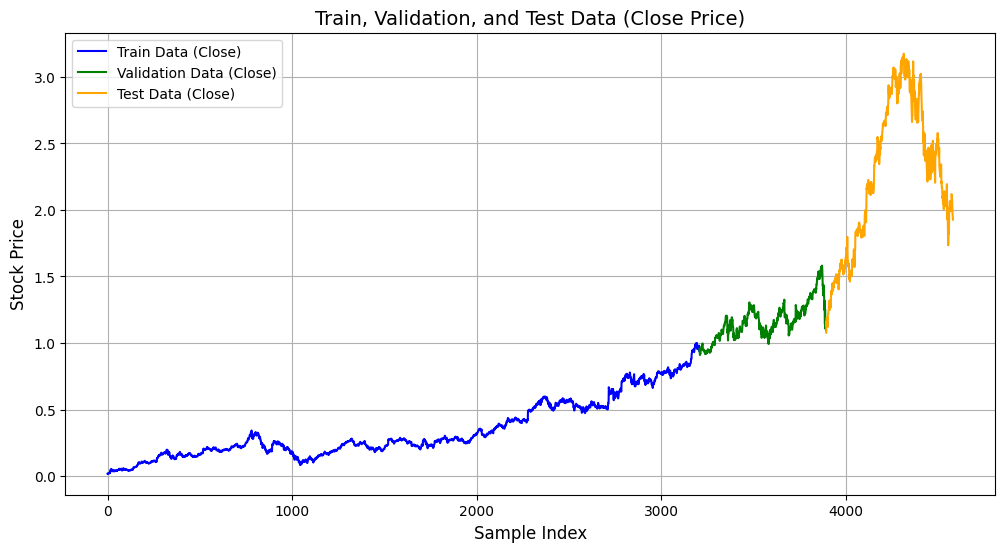

In [8]:
# Plotting the train, validation, and test data curves

# Extracting "Close" price data from y_train, y_val, and y_test
y_train_close = y_train[:, :, 3].reshape(-1)
y_val_close = y_val[:, :, 3].reshape(-1)
y_test_close = y_test[:, :, 3].reshape(-1)
train_indices = range(len(y_train_close))
val_indices = range(len(y_train_close), len(y_train_close) + len(y_val_close))
test_indices = range(len(y_train_close) + len(y_val_close), len(y_train_close) + len(y_val_close) + len(y_test_close))

# Plot the curves
plt.figure(figsize=(12, 6))
plt.plot(train_indices, y_train_close, label='Train Data (Close)', color='blue', linewidth=1.5)
plt.plot(val_indices, y_val_close, label='Validation Data (Close)', color='green', linewidth=1.5)
plt.plot(test_indices, y_test_close, label='Test Data (Close)', color='orange', linewidth=1.5)
plt.title('Train, Validation, and Test Data (Close Price)', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# Displaying dimensions of the split dataset
print("Training data dimensions:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")

print("Validation data dimensions:")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")

print("Test data dimensions:")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Training data dimensions:
X_train: (3207, 30, 5), y_train: (3207, 1, 5)
Validation data dimensions:
X_val: (687, 30, 5), y_val: (687, 1, 5)
Test data dimensions:
X_test: (688, 30, 5), y_test: (688, 1, 5)


# Baseline RNN Model

In [10]:
# Build the baseline Simple RNN model
baseline_rnn = Sequential([
    SimpleRNN(10, activation='relu', input_shape=(N, len(features))),
    Dense(M * len(features))
])

baseline_rnn.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
baseline_history = baseline_rnn.fit(X_train, y_train.reshape(y_train.shape[0], -1), 
                                    validation_data=(X_val, y_val.reshape(y_val.shape[0], -1)),
                                    epochs=20, batch_size=32, verbose=1)

# Evaluate on test data
baseline_test_loss, baseline_test_mae = baseline_rnn.evaluate(X_test, y_test.reshape(y_test.shape[0], -1), verbose=1)
print(f"Baseline Test Loss: {baseline_test_loss}, Test MAE: {baseline_test_mae}")

# Predict
y_test_pred_baseline = baseline_rnn.predict(X_test)

# Inverse transform for comparison
y_test_actual_baseline = scaler.inverse_transform(y_test.reshape(-1, y_test.shape[-1])).reshape(y_test.shape)
y_test_pred_baseline = scaler.inverse_transform(y_test_pred_baseline.reshape(-1, y_test_pred_baseline.shape[-1])).reshape(y_test.shape)

# Predict on validation data using the baseline model
y_val_pred_baseline = baseline_rnn.predict(X_val)

# Inverse transform the predictions
y_val_actual_baseline = scaler.inverse_transform(y_val.reshape(-1, y_val.shape[-1])).reshape(y_val.shape)
y_val_pred_baseline = scaler.inverse_transform(y_val_pred_baseline.reshape(-1, y_val_pred_baseline.shape[-1])).reshape(y_val.shape)

Epoch 1/20


E:\Codes_data\try\envs\ai\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1856 - mae: 0.2978 - val_loss: 0.3124 - val_mae: 0.4347
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0156 - mae: 0.0805 - val_loss: 0.0145 - val_mae: 0.0890
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0031 - mae: 0.0360 - val_loss: 0.0052 - val_mae: 0.0602
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018 - mae: 0.0268 - val_loss: 0.0022 - val_mae: 0.0398
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - mae: 0.0227 - val_loss: 0.0023 - val_mae: 0.0388
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0012 - mae: 0.0196 - val_loss: 0.0018 - val_mae: 0.0335
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0012 - mae: 0.0193 - val_loss: 0.0020 - val_mae: 0.0363
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0010 - mae: 0.0185 - val_loss: 0.0020 - val_mae: 0.0362
Epoch 9/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0012 

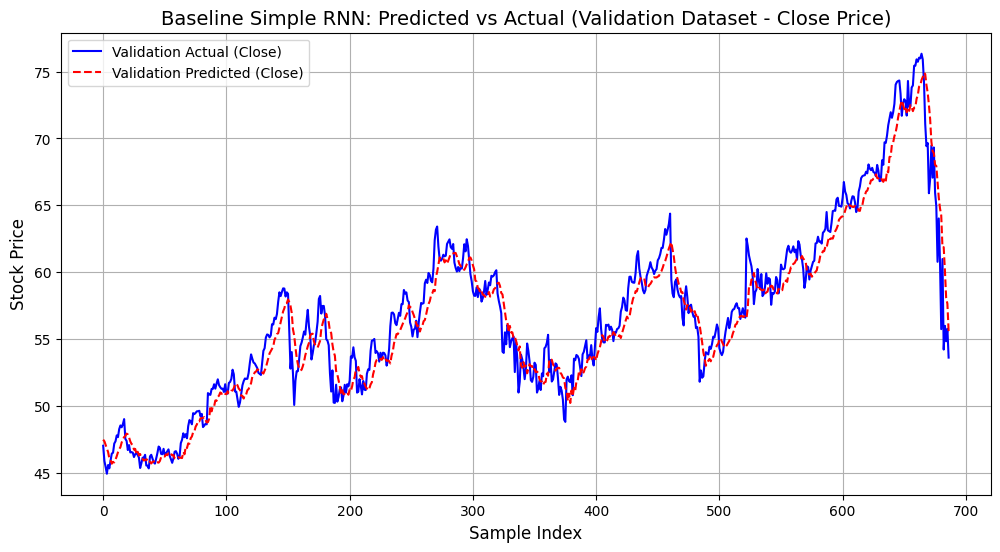

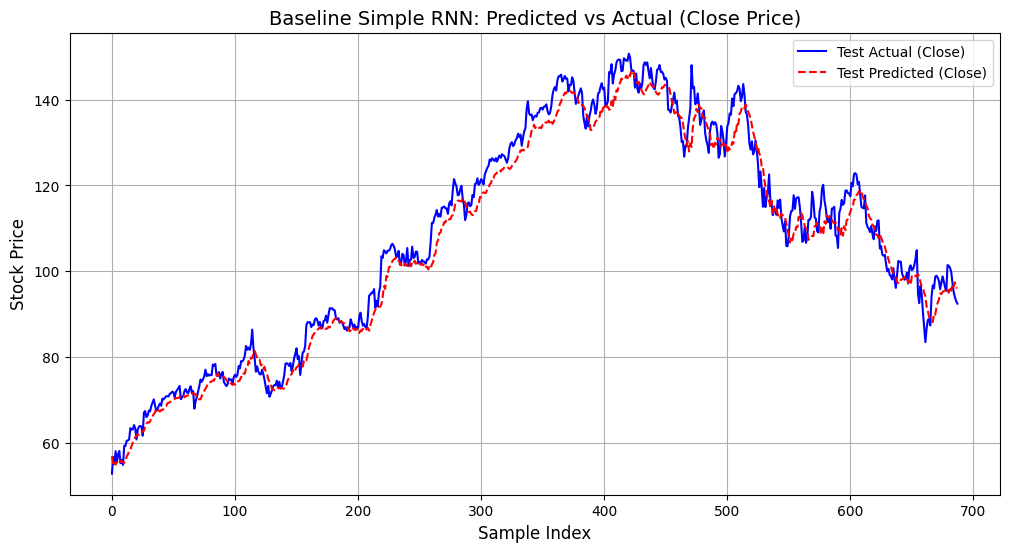

In [11]:
# Plot baseline validation results
plt.figure(figsize=(12, 6))
plt.plot(y_val_actual_baseline[:, 0, 3], label='Validation Actual (Close)', color='blue', linewidth=1.5)
plt.plot(y_val_pred_baseline[:, 0, 3], label='Validation Predicted (Close)', color='red', linestyle='--', linewidth=1.5)
plt.title('Baseline Simple RNN: Predicted vs Actual (Validation Dataset - Close Price)', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Plot baseline test data results
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual_baseline[:, 0, 3], label='Test Actual (Close)', color='blue', linewidth=1.5)
plt.plot(y_test_pred_baseline[:, 0, 3], label='Test Predicted (Close)', color='red', linestyle='--', linewidth=1.5)
plt.title('Baseline Simple RNN: Predicted vs Actual (Close Price)', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


# Optimise RNN Hyperparameters

In [12]:
# Define function for optimisation
def build_and_evaluate(units, learning_rate, batch_size, epochs):
    model = Sequential([
        SimpleRNN(units, activation='relu', input_shape=(N, len(features))),
        Dense(M * len(features))
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])
    history = model.fit(X_train, y_train.reshape(y_train.shape[0], -1), 
                        validation_data=(X_val, y_val.reshape(y_val.shape[0], -1)),
                        epochs=epochs, batch_size=batch_size, verbose=1)
    test_loss, test_mae = model.evaluate(X_test, y_test.reshape(y_test.shape[0], -1), verbose=0)
    print(f"Units: {units}, Learning Rate: {learning_rate}, Batch Size: {batch_size}, Epochs: {epochs}")
    print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")
    return model, history, test_loss, test_mae

# Optimise tuning 
results = []
for units in [50]:
    for lr in [0.001]:
        for batch in [32]:
            for epoch in [20]:
                opt_model, opt_history, opt_test_loss, opt_test_mae = build_and_evaluate(units, lr, batch, epoch)
                results.append((units, lr, batch, epoch, opt_test_loss, opt_test_mae))

# Display results
results_df = pd.DataFrame(results, columns=['Units', 'Learning Rate', 'Batch Size', 'Epochs', 'Test Loss', 'Test MAE'])
print("\nOptimized RNN Results:")
print(results_df)

# Predict on test data using optimised model
y_test_pred_optimized = opt_model.predict(X_test)

# Inverse transform
y_test_actual_optimized = scaler.inverse_transform(y_test.reshape(-1, y_test.shape[-1])).reshape(y_test.shape)
y_test_pred_optimized = scaler.inverse_transform(y_test_pred_optimized.reshape(-1, y_test_pred_optimized.shape[-1])).reshape(y_test.shape)

# Predict on validation data using the optimised model
y_val_pred_optimized = opt_model.predict(X_val)

# Inverse transform the predictions
y_val_actual_optimized = scaler.inverse_transform(y_val.reshape(-1, y_val.shape[-1])).reshape(y_val.shape)
y_val_pred_optimized = scaler.inverse_transform(y_val_pred_optimized.reshape(-1, y_val_pred_optimized.shape[-1])).reshape(y_val.shape)

Epoch 1/20


E:\Codes_data\try\envs\ai\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0748 - mae: 0.1642 - val_loss: 0.0024 - val_mae: 0.0406
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.8004e-04 - mae: 0.0165 - val_loss: 0.0011 - val_mae: 0.0264
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.0754e-04 - mae: 0.0145 - val_loss: 0.0011 - val_mae: 0.0249
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.0094e-04 - mae: 0.0134 - val_loss: 8.9475e-04 - val_mae: 0.0216
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.9500e-04 - mae: 0.0128 - val_loss: 6.9041e-04 - val_mae: 0.0191
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.0986e-04 - mae: 0.0127 - val_loss: 6.9501e-04 - val_mae: 0.0190
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.2279e-04 - mae: 0.0124 - val_loss: 8.2567e-04 - val_mae: 0.0206
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.1828e-04 - mae: 0.0119 - val_loss: 7.3479e-04 - val_mae: 0.0208
Epoch 9/20
101/101 

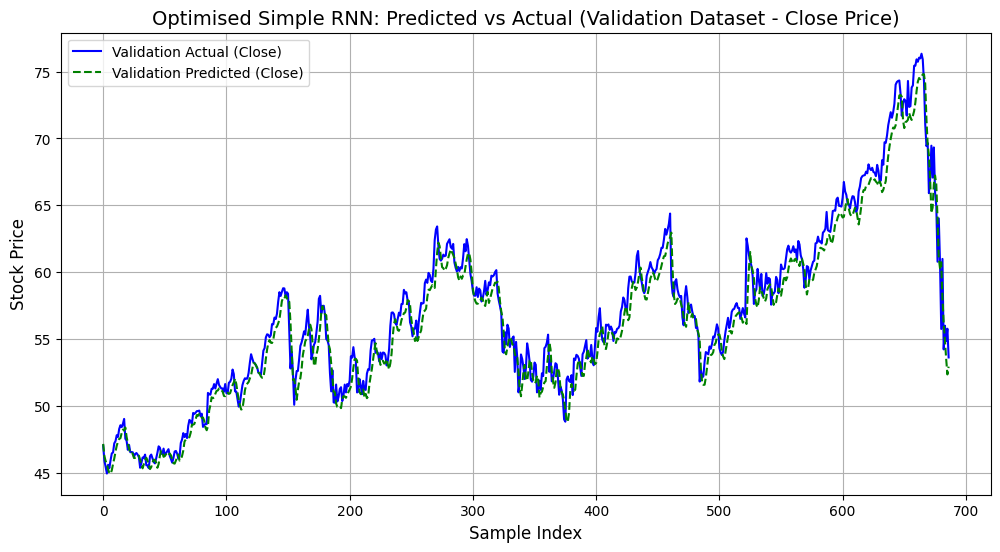

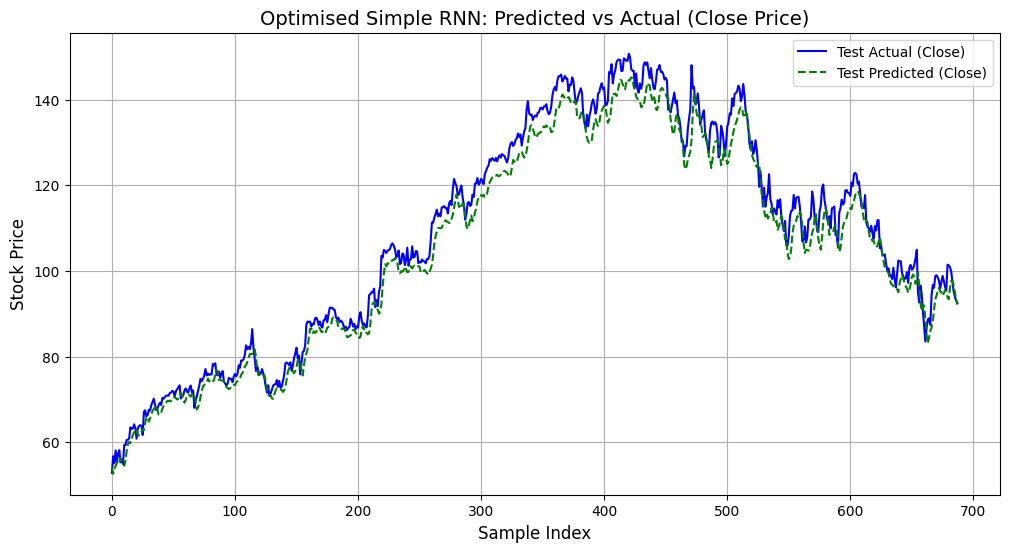

In [13]:
# Plot optimised validation results
plt.figure(figsize=(12, 6))
plt.plot(y_val_actual_optimized[:, 0, 3], label='Validation Actual (Close)', color='blue', linewidth=1.5)
plt.plot(y_val_pred_optimized[:, 0, 3], label='Validation Predicted (Close)', color='green', linestyle='--', linewidth=1.5)
plt.title('Optimised Simple RNN: Predicted vs Actual (Validation Dataset - Close Price)', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Plot optimised results
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual_optimized[:, 0, 3], label='Test Actual (Close)', color='blue', linewidth=1.5)
plt.plot(y_test_pred_optimized[:, 0, 3], label='Test Predicted (Close)', color='green', linestyle='--', linewidth=1.5)
plt.title('Optimised Simple RNN: Predicted vs Actual (Close Price)', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


#  Baseline LSTM Model

In [14]:
# Build LSTM baseline model
baseline_lstm = Sequential([
    LSTM(10, activation='relu', input_shape=(N, len(features))),
    Dense(M * len(features))
])

# Compile the model
baseline_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the LSTM baseline model
baseline_lstm_history = baseline_lstm.fit(X_train, y_train.reshape(y_train.shape[0], -1),
                                          validation_data=(X_val, y_val.reshape(y_val.shape[0], -1)),
                                          epochs=20, batch_size=32, verbose=1)

# Evaluate on test data
baseline_lstm_test_loss, baseline_lstm_test_mae = baseline_lstm.evaluate(X_test, y_test.reshape(y_test.shape[0], -1), verbose=1)
print(f"Baseline LSTM Test Loss: {baseline_lstm_test_loss}, Test MAE: {baseline_lstm_test_mae}")

# Predict on validation and test data
y_val_pred_baseline_lstm = baseline_lstm.predict(X_val)
y_test_pred_baseline_lstm = baseline_lstm.predict(X_test)

# Inverse transform the predictions
y_val_actual_baseline_lstm = scaler.inverse_transform(y_val.reshape(-1, y_val.shape[-1])).reshape(y_val.shape)
y_val_pred_baseline_lstm = scaler.inverse_transform(y_val_pred_baseline_lstm.reshape(-1, y_val_pred_baseline_lstm.shape[-1])).reshape(y_val.shape)
y_test_actual_baseline_lstm = scaler.inverse_transform(y_test.reshape(-1, y_test.shape[-1])).reshape(y_test.shape)
y_test_pred_baseline_lstm = scaler.inverse_transform(y_test_pred_baseline_lstm.reshape(-1, y_test_pred_baseline_lstm.shape[-1])).reshape(y_test.shape)



Epoch 1/20


E:\Codes_data\try\envs\ai\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1151 - mae: 0.2613 - val_loss: 0.5027 - val_mae: 0.5636
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0183 - mae: 0.0848 - val_loss: 0.5132 - val_mae: 0.5375
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0029 - mae: 0.0353 - val_loss: 0.1448 - val_mae: 0.3047
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0017 - mae: 0.0244 - val_loss: 0.0879 - val_mae: 0.1945
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013 - mae: 0.0212 - val_loss: 0.0730 - val_mae: 0.1602
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0015 - mae: 0.0206 - val_loss: 0.0646 - val_mae: 0.1513
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0012 - mae: 0.0193 - val_loss: 0.0604 - val_mae: 0.1475
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011 - mae: 0.0184 - val_loss: 0.0517 - val_mae: 0.1448
Epoch 9/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011

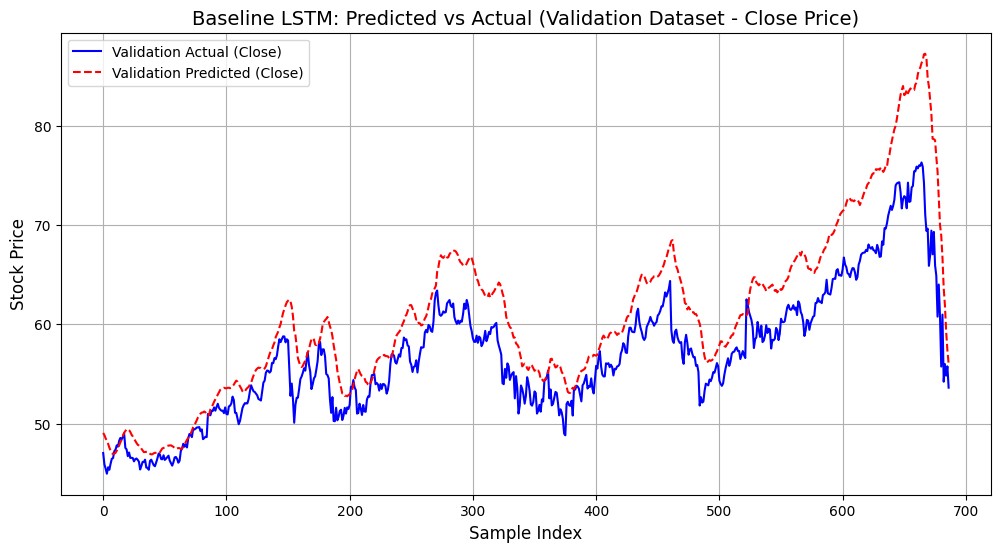

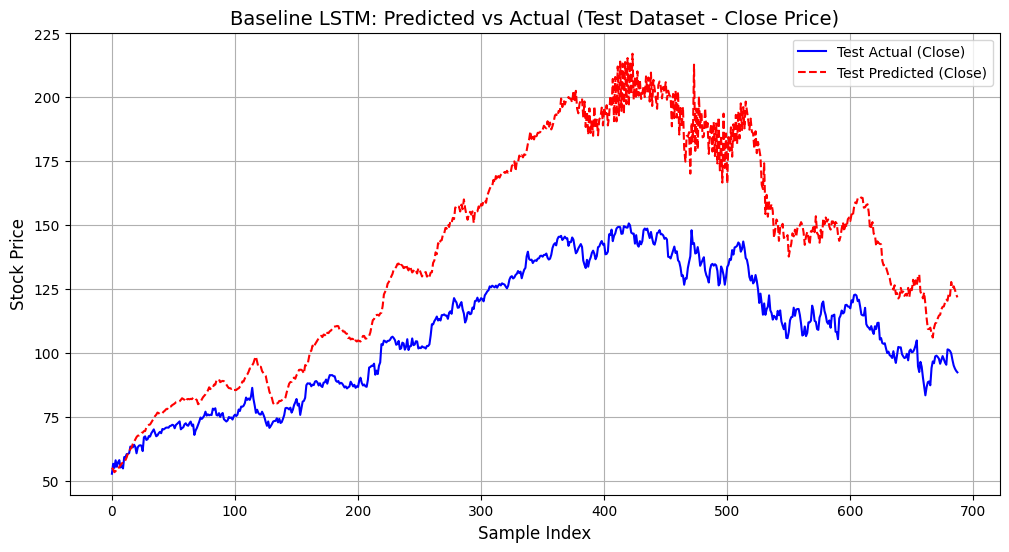

In [15]:
# Plot validation dataset results for baseline LSTM
plt.figure(figsize=(12, 6))
plt.plot(y_val_actual_baseline_lstm[:, 0, 3], label='Validation Actual (Close)', color='blue', linewidth=1.5)
plt.plot(y_val_pred_baseline_lstm[:, 0, 3], label='Validation Predicted (Close)', color='red', linestyle='--', linewidth=1.5)
plt.title('Baseline LSTM: Predicted vs Actual (Validation Dataset - Close Price)', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Plot test dataset results for baseline LSTM
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual_baseline_lstm[:, 0, 3], label='Test Actual (Close)', color='blue', linewidth=1.5)
plt.plot(y_test_pred_baseline_lstm[:, 0, 3], label='Test Predicted (Close)', color='red', linestyle='--', linewidth=1.5)
plt.title('Baseline LSTM: Predicted vs Actual (Test Dataset - Close Price)', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Optimise LSTM Hyperparameters

In [16]:
# Function to build and evaluate LSTM model with different hyperparameters
def build_and_evaluate_lstm(units, batch_size):
    model = Sequential([
        LSTM(units, activation='relu', input_shape=(N, len(features))),
        Dense(M * len(features))
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    history = model.fit(X_train, y_train.reshape(y_train.shape[0], -1), 
                        validation_data=(X_val, y_val.reshape(y_val.shape[0], -1)), 
                        epochs=20, batch_size=batch_size, verbose=1)
    test_loss, test_mae = model.evaluate(X_test, y_test.reshape(y_test.shape[0], -1), verbose=0)
    return test_loss, test_mae, model, history

# Test different hyperparameter combinations for LSTM
lstm_results = []
for units in [50]:  
    for batch_size in [32]:  
        test_loss, test_mae, lstm_model, lstm_history = build_and_evaluate_lstm(units, batch_size)
        lstm_results.append((units, batch_size, test_loss, test_mae))

# Display results
lstm_results_df = pd.DataFrame(lstm_results, columns=['Units', 'Batch Size', 'Test Loss', 'Test MAE'])
print("\nOptimised LSTM Results:")
print(lstm_results_df)

# Ensure input shapes are consistent for prediction
X_val_corrected = X_val.reshape(X_val.shape[0], X_val.shape[1], len(features))
X_test_corrected = X_test.reshape(X_test.shape[0], X_test.shape[1], len(features))

# Predict on validation and test data using optimized LSTM model
y_val_pred_scaled_lstm = lstm_model.predict(X_val_corrected)
y_test_pred_scaled_lstm = lstm_model.predict(X_test_corrected)

# Inverse transform the predictions for validation
y_val_actual_lstm = scaler.inverse_transform(y_val.reshape(-1, y_val.shape[-1])).reshape(y_val.shape)
y_val_pred_lstm = scaler.inverse_transform(y_val_pred_scaled_lstm.reshape(-1, y_val_pred_scaled_lstm.shape[-1])).reshape(y_val.shape)

# Inverse transform the predictions for test
y_test_actual_lstm = scaler.inverse_transform(y_test.reshape(-1, y_test.shape[-1])).reshape(y_test.shape)
y_test_pred_lstm = scaler.inverse_transform(y_test_pred_scaled_lstm.reshape(-1, y_test_pred_scaled_lstm.shape[-1])).reshape(y_test.shape)



Epoch 1/20


E:\Codes_data\try\envs\ai\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0375 - mae: 0.1134 - val_loss: 0.0156 - val_mae: 0.0892
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011 - mae: 0.0173 - val_loss: 0.0033 - val_mae: 0.0410
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.5793e-04 - mae: 0.0154 - val_loss: 0.0013 - val_mae: 0.0284
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.9568e-04 - mae: 0.0146 - val_loss: 0.0036 - val_mae: 0.0471
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.2309e-04 - mae: 0.0149 - val_loss: 0.0013 - val_mae: 0.0262
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.0272e-04 - mae: 0.0138 - val_loss: 0.0031 - val_mae: 0.0411
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.0936e-04 - mae: 0.0131 - val_loss: 0.0018 - val_mae: 0.0344
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.5910e-04 - mae: 0.0137 - val_loss: 0.0016 - val_mae: 0.0293
Epoch 9/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 

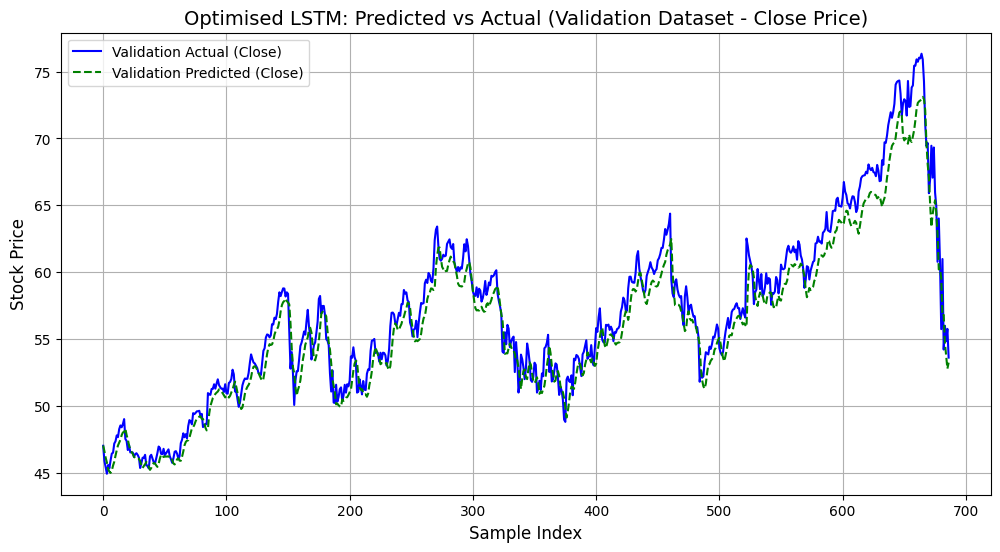

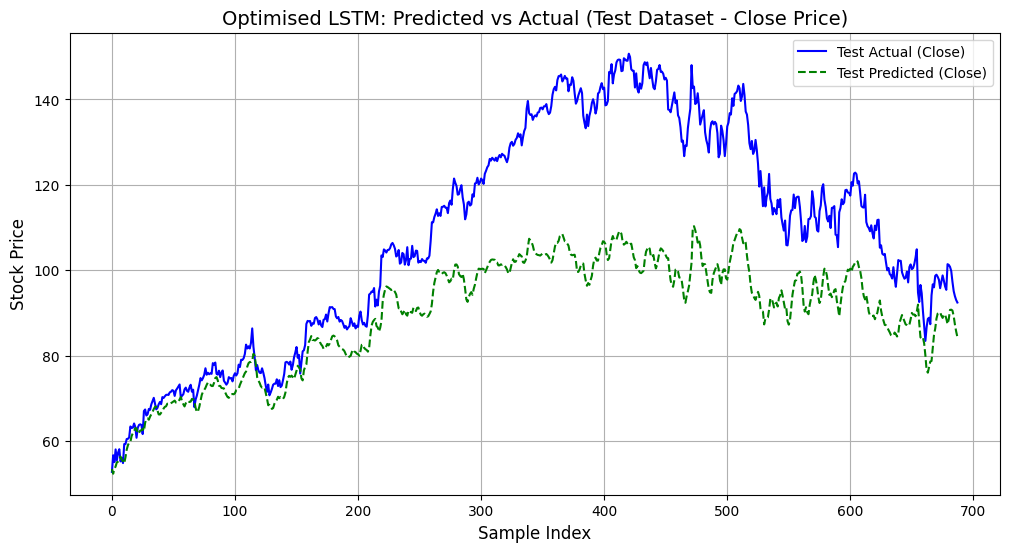

In [17]:
# Plot validation dataset results for optimized LSTM
plt.figure(figsize=(12, 6))
plt.plot(y_val_actual_lstm[:, 0, 3], label='Validation Actual (Close)', color='blue', linewidth=1.5)
plt.plot(y_val_pred_lstm[:, 0, 3], label='Validation Predicted (Close)', color='green', linestyle='--', linewidth=1.5)
plt.title('Optimised LSTM: Predicted vs Actual (Validation Dataset - Close Price)', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Plot test dataset results for optimized LSTM
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual_lstm[:, 0, 3], label='Test Actual (Close)', color='blue', linewidth=1.5)
plt.plot(y_test_pred_lstm[:, 0, 3], label='Test Predicted (Close)', color='green', linestyle='--', linewidth=1.5)
plt.title('Optimised LSTM: Predicted vs Actual (Test Dataset - Close Price)', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Baseline GRU

In [18]:
# Build GRU baseline model
baseline_gru = Sequential([
    GRU(10, activation='relu', input_shape=(N, len(features))),
    Dense(M * len(features))
])

# Compile the model
baseline_gru.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the GRU baseline model
baseline_gru_history = baseline_gru.fit(X_train, y_train.reshape(y_train.shape[0], -1),
                                        validation_data=(X_val, y_val.reshape(y_val.shape[0], -1)),
                                        epochs=20, batch_size=32, verbose=1)

# Evaluate on test data
baseline_gru_test_loss, baseline_gru_test_mae = baseline_gru.evaluate(X_test, y_test.reshape(y_test.shape[0], -1), verbose=1)
print(f"Baseline GRU Test Loss: {baseline_gru_test_loss}, Test MAE: {baseline_gru_test_mae}")

# Predict on validation and test data
y_val_pred_baseline_gru = baseline_gru.predict(X_val)
y_test_pred_baseline_gru = baseline_gru.predict(X_test)

# Inverse transform the predictions
y_val_actual_baseline_gru = scaler.inverse_transform(y_val.reshape(-1, y_val.shape[-1])).reshape(y_val.shape)
y_val_pred_baseline_gru = scaler.inverse_transform(y_val_pred_baseline_gru.reshape(-1, y_val_pred_baseline_gru.shape[-1])).reshape(y_val.shape)
y_test_actual_baseline_gru = scaler.inverse_transform(y_test.reshape(-1, y_test.shape[-1])).reshape(y_test.shape)
y_test_pred_baseline_gru = scaler.inverse_transform(y_test_pred_baseline_gru.reshape(-1, y_test_pred_baseline_gru.shape[-1])).reshape(y_test.shape)



Epoch 1/20


E:\Codes_data\try\envs\ai\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1327 - mae: 0.2736 - val_loss: 0.3800 - val_mae: 0.5631
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0193 - mae: 0.0915 - val_loss: 0.0405 - val_mae: 0.1778
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0027 - mae: 0.0351 - val_loss: 0.0052 - val_mae: 0.0513
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0010 - mae: 0.0198 - val_loss: 0.0035 - val_mae: 0.0389
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0010 - mae: 0.0182 - val_loss: 0.0033 - val_mae: 0.0386
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.9803e-04 - mae: 0.0175 - val_loss: 0.0036 - val_mae: 0.0402
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.9335e-04 - mae: 0.0165 - val_loss: 0.0032 - val_mae: 0.0377
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.2576e-04 - mae: 0.0160 - val_loss: 0.0035 - val_mae: 0.0395
Epoch 9/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - 

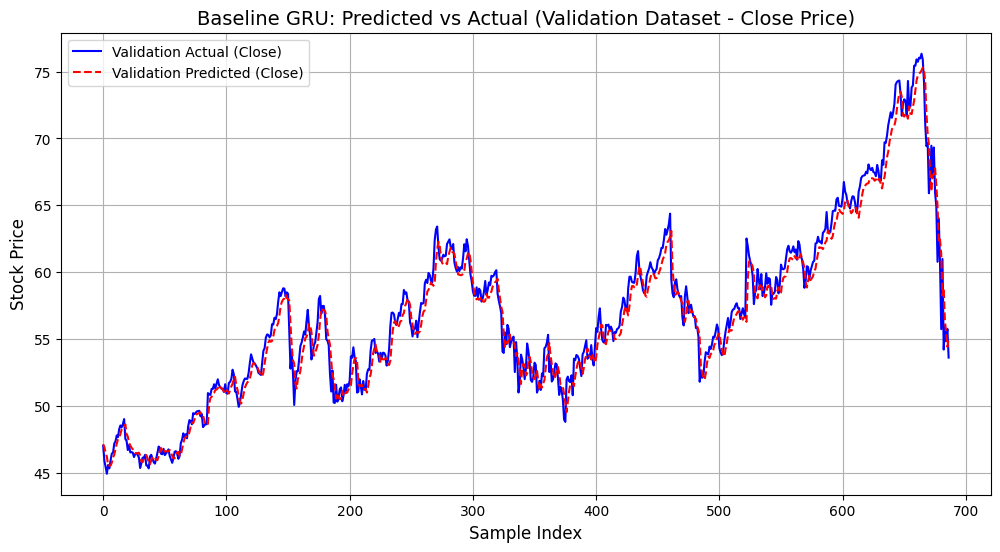

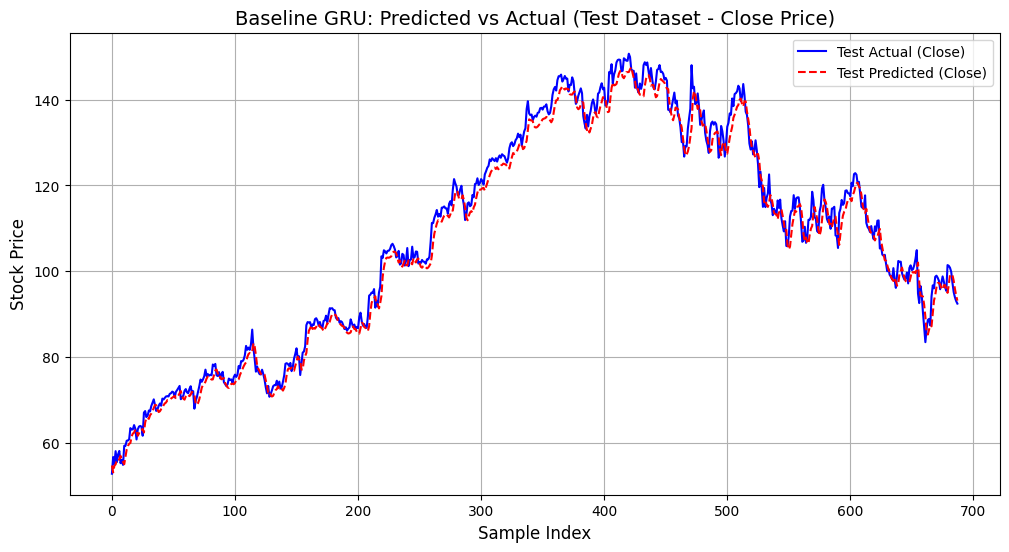

In [19]:
# Plot validation dataset results for baseline GRU
plt.figure(figsize=(12, 6))
plt.plot(y_val_actual_baseline_gru[:, 0, 3], label='Validation Actual (Close)', color='blue', linewidth=1.5)
plt.plot(y_val_pred_baseline_gru[:, 0, 3], label='Validation Predicted (Close)', color='red', linestyle='--', linewidth=1.5)
plt.title('Baseline GRU: Predicted vs Actual (Validation Dataset - Close Price)', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Plot test dataset results for baseline GRU
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual_baseline_gru[:, 0, 3], label='Test Actual (Close)', color='blue', linewidth=1.5)
plt.plot(y_test_pred_baseline_gru[:, 0, 3], label='Test Predicted (Close)', color='red', linestyle='--', linewidth=1.5)
plt.title('Baseline GRU: Predicted vs Actual (Test Dataset - Close Price)', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


# Optimised GRU Hyperparameters

In [20]:
# Function to build and evaluate GRU model with different hyperparameters
def build_and_evaluate_gru(units, batch_size):
    model = Sequential([
        GRU(units, activation='relu', input_shape=(N, len(features))),
        Dense(M * len(features))
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    history = model.fit(X_train, y_train.reshape(y_train.shape[0], -1), 
                        validation_data=(X_val, y_val.reshape(y_val.shape[0], -1)), 
                        epochs=20, batch_size=batch_size, verbose=1)
    test_loss, test_mae = model.evaluate(X_test, y_test.reshape(y_test.shape[0], -1), verbose=0)
    return test_loss, test_mae, model, history

# Test different hyperparameter combinations for GRU
gru_results = []
for units in [50]:  
    for batch_size in [32]: 
        test_loss, test_mae, gru_model, gru_history = build_and_evaluate_gru(units, batch_size)
        gru_results.append((units, batch_size, test_loss, test_mae))

# Display results
gru_results_df = pd.DataFrame(gru_results, columns=['Units', 'Batch Size', 'Test Loss', 'Test MAE'])
print("\Optimised GRU Results:")
print(gru_results_df)

# Ensure input shapes are consistent for prediction
X_val_corrected = X_val.reshape(X_val.shape[0], X_val.shape[1], len(features))
X_test_corrected = X_test.reshape(X_test.shape[0], X_test.shape[1], len(features))

# Predict on validation and test data using optimized GRU model
y_val_pred_scaled_gru = gru_model.predict(X_val_corrected)
y_test_pred_scaled_gru = gru_model.predict(X_test_corrected)

# Inverse transform the predictions for validation
y_val_actual_gru = scaler.inverse_transform(y_val.reshape(-1, y_val.shape[-1])).reshape(y_val.shape)
y_val_pred_gru = scaler.inverse_transform(y_val_pred_scaled_gru.reshape(-1, y_val_pred_scaled_gru.shape[-1])).reshape(y_val.shape)

# Inverse transform the predictions for test
y_test_actual_gru = scaler.inverse_transform(y_test.reshape(-1, y_test.shape[-1])).reshape(y_test.shape)
y_test_pred_gru = scaler.inverse_transform(y_test_pred_scaled_gru.reshape(-1, y_test_pred_scaled_gru.shape[-1])).reshape(y_test.shape)



Epoch 1/20


E:\Codes_data\try\envs\ai\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0535 - mae: 0.1565 - val_loss: 0.0050 - val_mae: 0.0543
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.4849e-04 - mae: 0.0152 - val_loss: 0.0024 - val_mae: 0.0310
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.1039e-04 - mae: 0.0123 - val_loss: 0.0016 - val_mae: 0.0259
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.9471e-04 - mae: 0.0109 - val_loss: 0.0020 - val_mae: 0.0308
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.1676e-04 - mae: 0.0112 - val_loss: 0.0012 - val_mae: 0.0226
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.8268e-04 - mae: 0.0107 - val_loss: 0.0012 - val_mae: 0.0248
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.1866e-04 - mae: 0.0107 - val_loss: 5.4517e-04 - val_mae: 0.0162
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.0301e-04 - mae: 0.0108 - val_loss: 6.5114e-04 - val_mae: 0.0179
Epoch 9/20
101/101 ━━━━━━━━━━

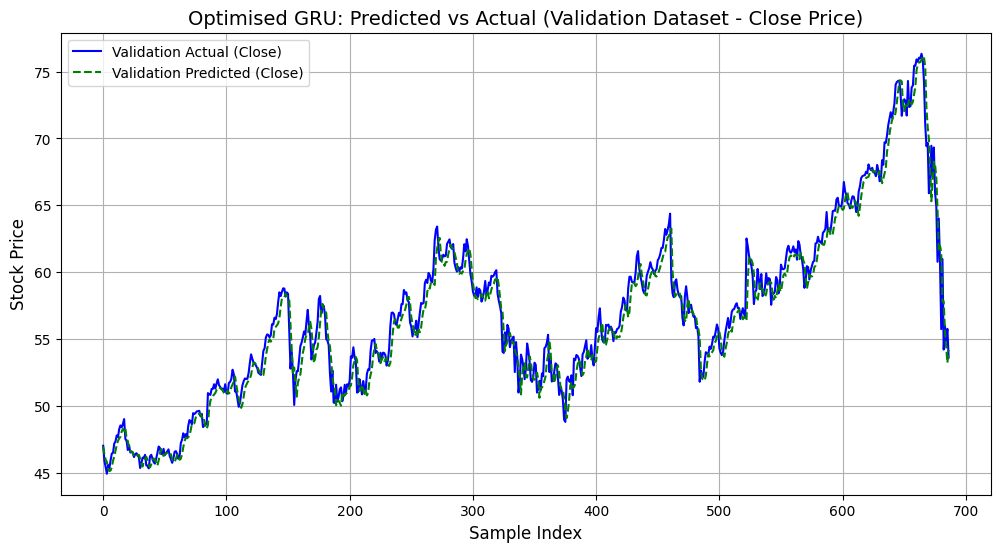

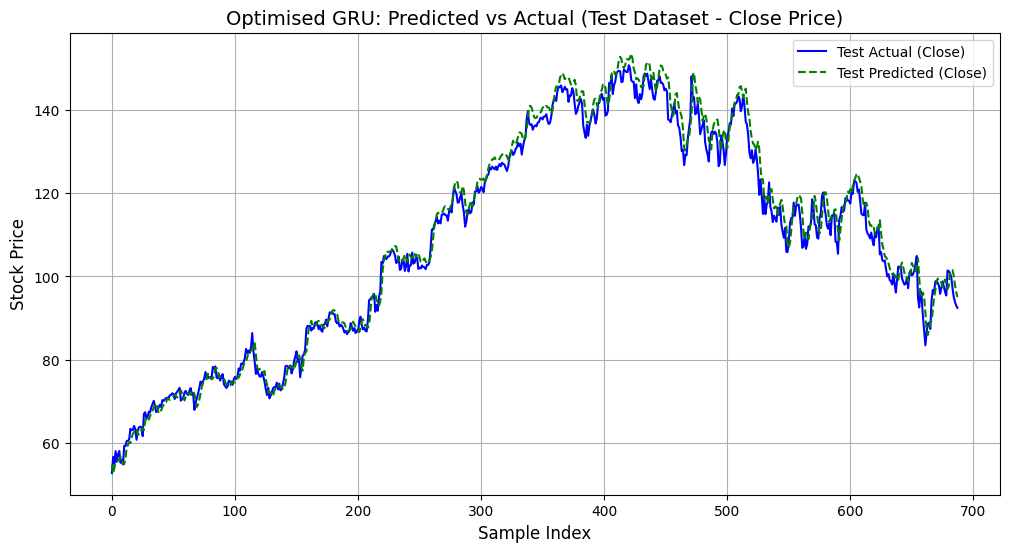

In [21]:
# Plot validation dataset results for optimized GRU
plt.figure(figsize=(12, 6))
plt.plot(y_val_actual_gru[:, 0, 3], label='Validation Actual (Close)', color='blue', linewidth=1.5)
plt.plot(y_val_pred_gru[:, 0, 3], label='Validation Predicted (Close)', color='green', linestyle='--', linewidth=1.5)
plt.title('Optimised GRU: Predicted vs Actual (Validation Dataset - Close Price)', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Plot test dataset results for optimized GRU
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual_gru[:, 0, 3], label='Test Actual (Close)', color='blue', linewidth=1.5)
plt.plot(y_test_pred_gru[:, 0, 3], label='Test Predicted (Close)', color='green', linestyle='--', linewidth=1.5)
plt.title('Optimised GRU: Predicted vs Actual (Test Dataset - Close Price)', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


# Acknowledgment
## In this assignment, some of the code and techniques were adapted from various sources, including internet resources, ChatGPT, and workshop materials. These sources provided a foundation for building and optimising the deep learning models used in the project. However, significant modifications were made to tailor the code to the specific requirements of this assignment, including adjustments to the model architectures, hyperparameter tuning, and data processing steps.